# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset bersumber Kaggle ini dapat diperoleh melalui tautan berikut: [Weather_Data](https://www.kaggle.com/datasets/rever3nd/weather-data).


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

pd.set_option("display.max_columns", None)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv("../weather_raw.csv", index_col="Unnamed: 0")

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [3]:
# df = df.drop(columns="Unnamed: 0")

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           25000 non-null  object 
 1   Location       25000 non-null  object 
 2   MinTemp        24669 non-null  float64
 3   MaxTemp        24824 non-null  float64
 4   Rainfall       24721 non-null  float64
 5   Evaporation    9432 non-null   float64
 6   Sunshine       6664 non-null   float64
 7   WindGustDir    21543 non-null  object 
 8   WindGustSpeed  21545 non-null  float64
 9   WindDir9am     21928 non-null  object 
 10  WindDir3pm     23267 non-null  object 
 11  WindSpeed9am   24428 non-null  float64
 12  WindSpeed3pm   23770 non-null  float64
 13  Humidity9am    24609 non-null  float64
 14  Humidity3pm    23936 non-null  float64
 15  Pressure9am    20172 non-null  float64
 16  Pressure3pm    20173 non-null  float64
 17  Cloud9am       14136 non-null  float64
 18  Cloud3pm   

Insight:
- Menghapus kolom Unnamed : 0 karena bukan sebagai fitur, melainkan index bawaan dari file dataset.

- Berikut keterangan setiap kolom:
0. Date: tanggal data diambil.
1. Location: tempat dalam area negara Australia.
2. MinTemp: minimum temperatur.
3. MaxTemp: maximum tempereatur.
4. Rainfall: curah hujan.
5. Evaporation: volume air yang menguap dari suatu area dalam satuan waktu.
6. Sunshine: lama penyinaran matahari.
7. WindGustDir: arah angin yang tidak menentu.
8. WindGustSpeed: kecepatan angin yang tidak menentu.
9. WindDir9am: arah angin pada pukul 9 pagi.
10. WindDir3pm: arah angin pada pukul 3 sore.
11. WindSpeed9am: kecepatan angin pada pukul 9 pagi.
12. WindSpeed3pm: kecepatan angin pada pukul 3 sore.
13. Humidity9am: kelembapan pada pukul 9 pagi.
14. Humidity3pm: kelembapan pada pukul 3 sore.
15. Pressure9am: tekanan atmosfer pada pukul 9 pagi.
16. Pressure3pm: tekanan atmosfer pada pukul 3 sore.
17. Cloud9am: jumlah awan pada pukul 9 pagi.
18. Cloud3pm: jumlah awan pada pukul 3 sore.
19. TempDir9am: temperatur pada pukul 9 pagi.
20. TempDir3pm: temperatur pada pukul 3 sore.
21. RainToday: status cuaca hari ini apakah hujan atau tidak.
22. RISK_MM: tingat risiko cuaca.
23. RainTomorrow: status cuaca hari esok apakah hujan atau tidak.
---

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

C:\Users\Mahen\AppData\Local\Temp\ipykernel_6004\1804835145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
C:\Users\Mahen\AppData\Local\Temp\ipykernel_6004\1804835145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
C:\Users\Mahen\AppData\Local\Temp\ipykernel_6004\1804835145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
C:\User

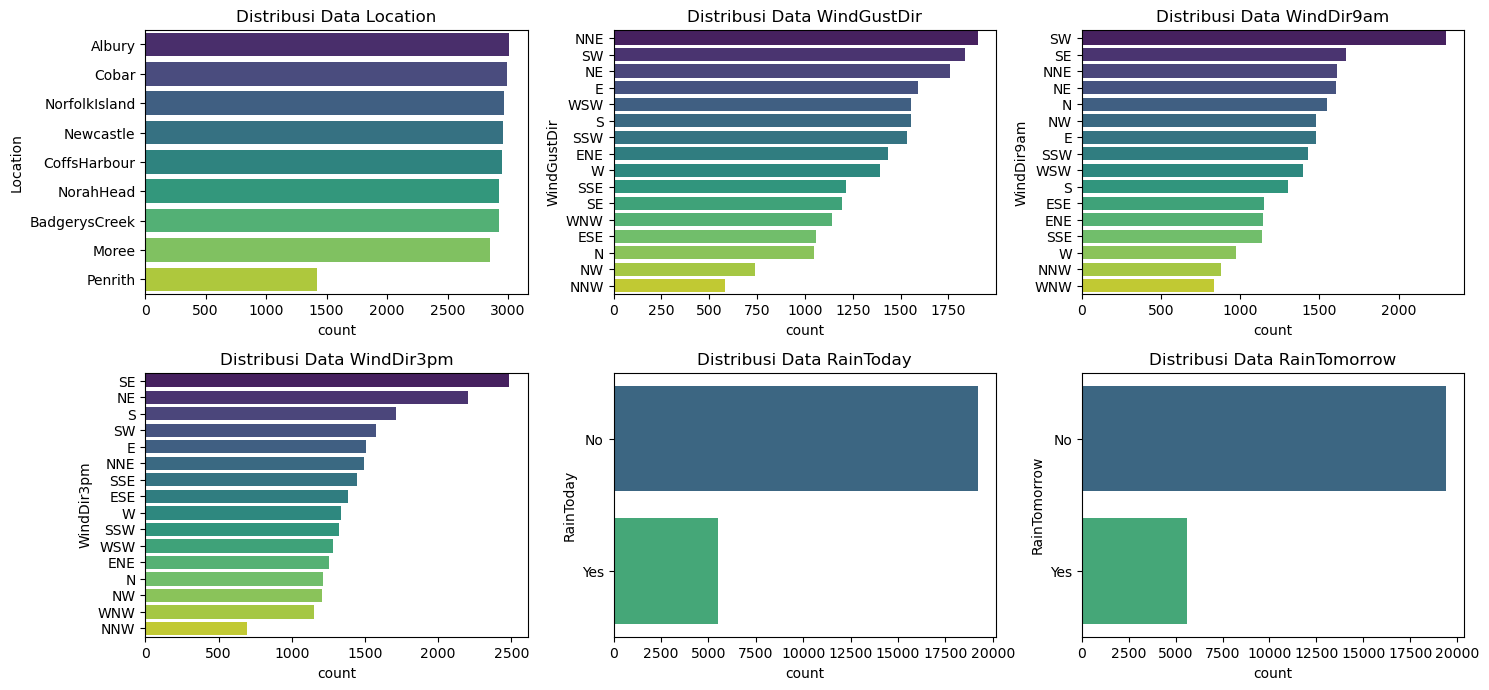

In [4]:
categorical_columns = df.select_dtypes(include="object").drop(columns="Date").columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(3, 3, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
    plt.title(f"Distribusi Data {col}")
plt.tight_layout()
plt.show()

Insight:
- Tidak menampilkan distribusi data kolom Date dilakukan karena kolom ini tidak digunakan sebagai fitur untuk pemodelan machine learning.

- Kolom RainTomorrow sebagai label untuk pemodelan machine learning.
---

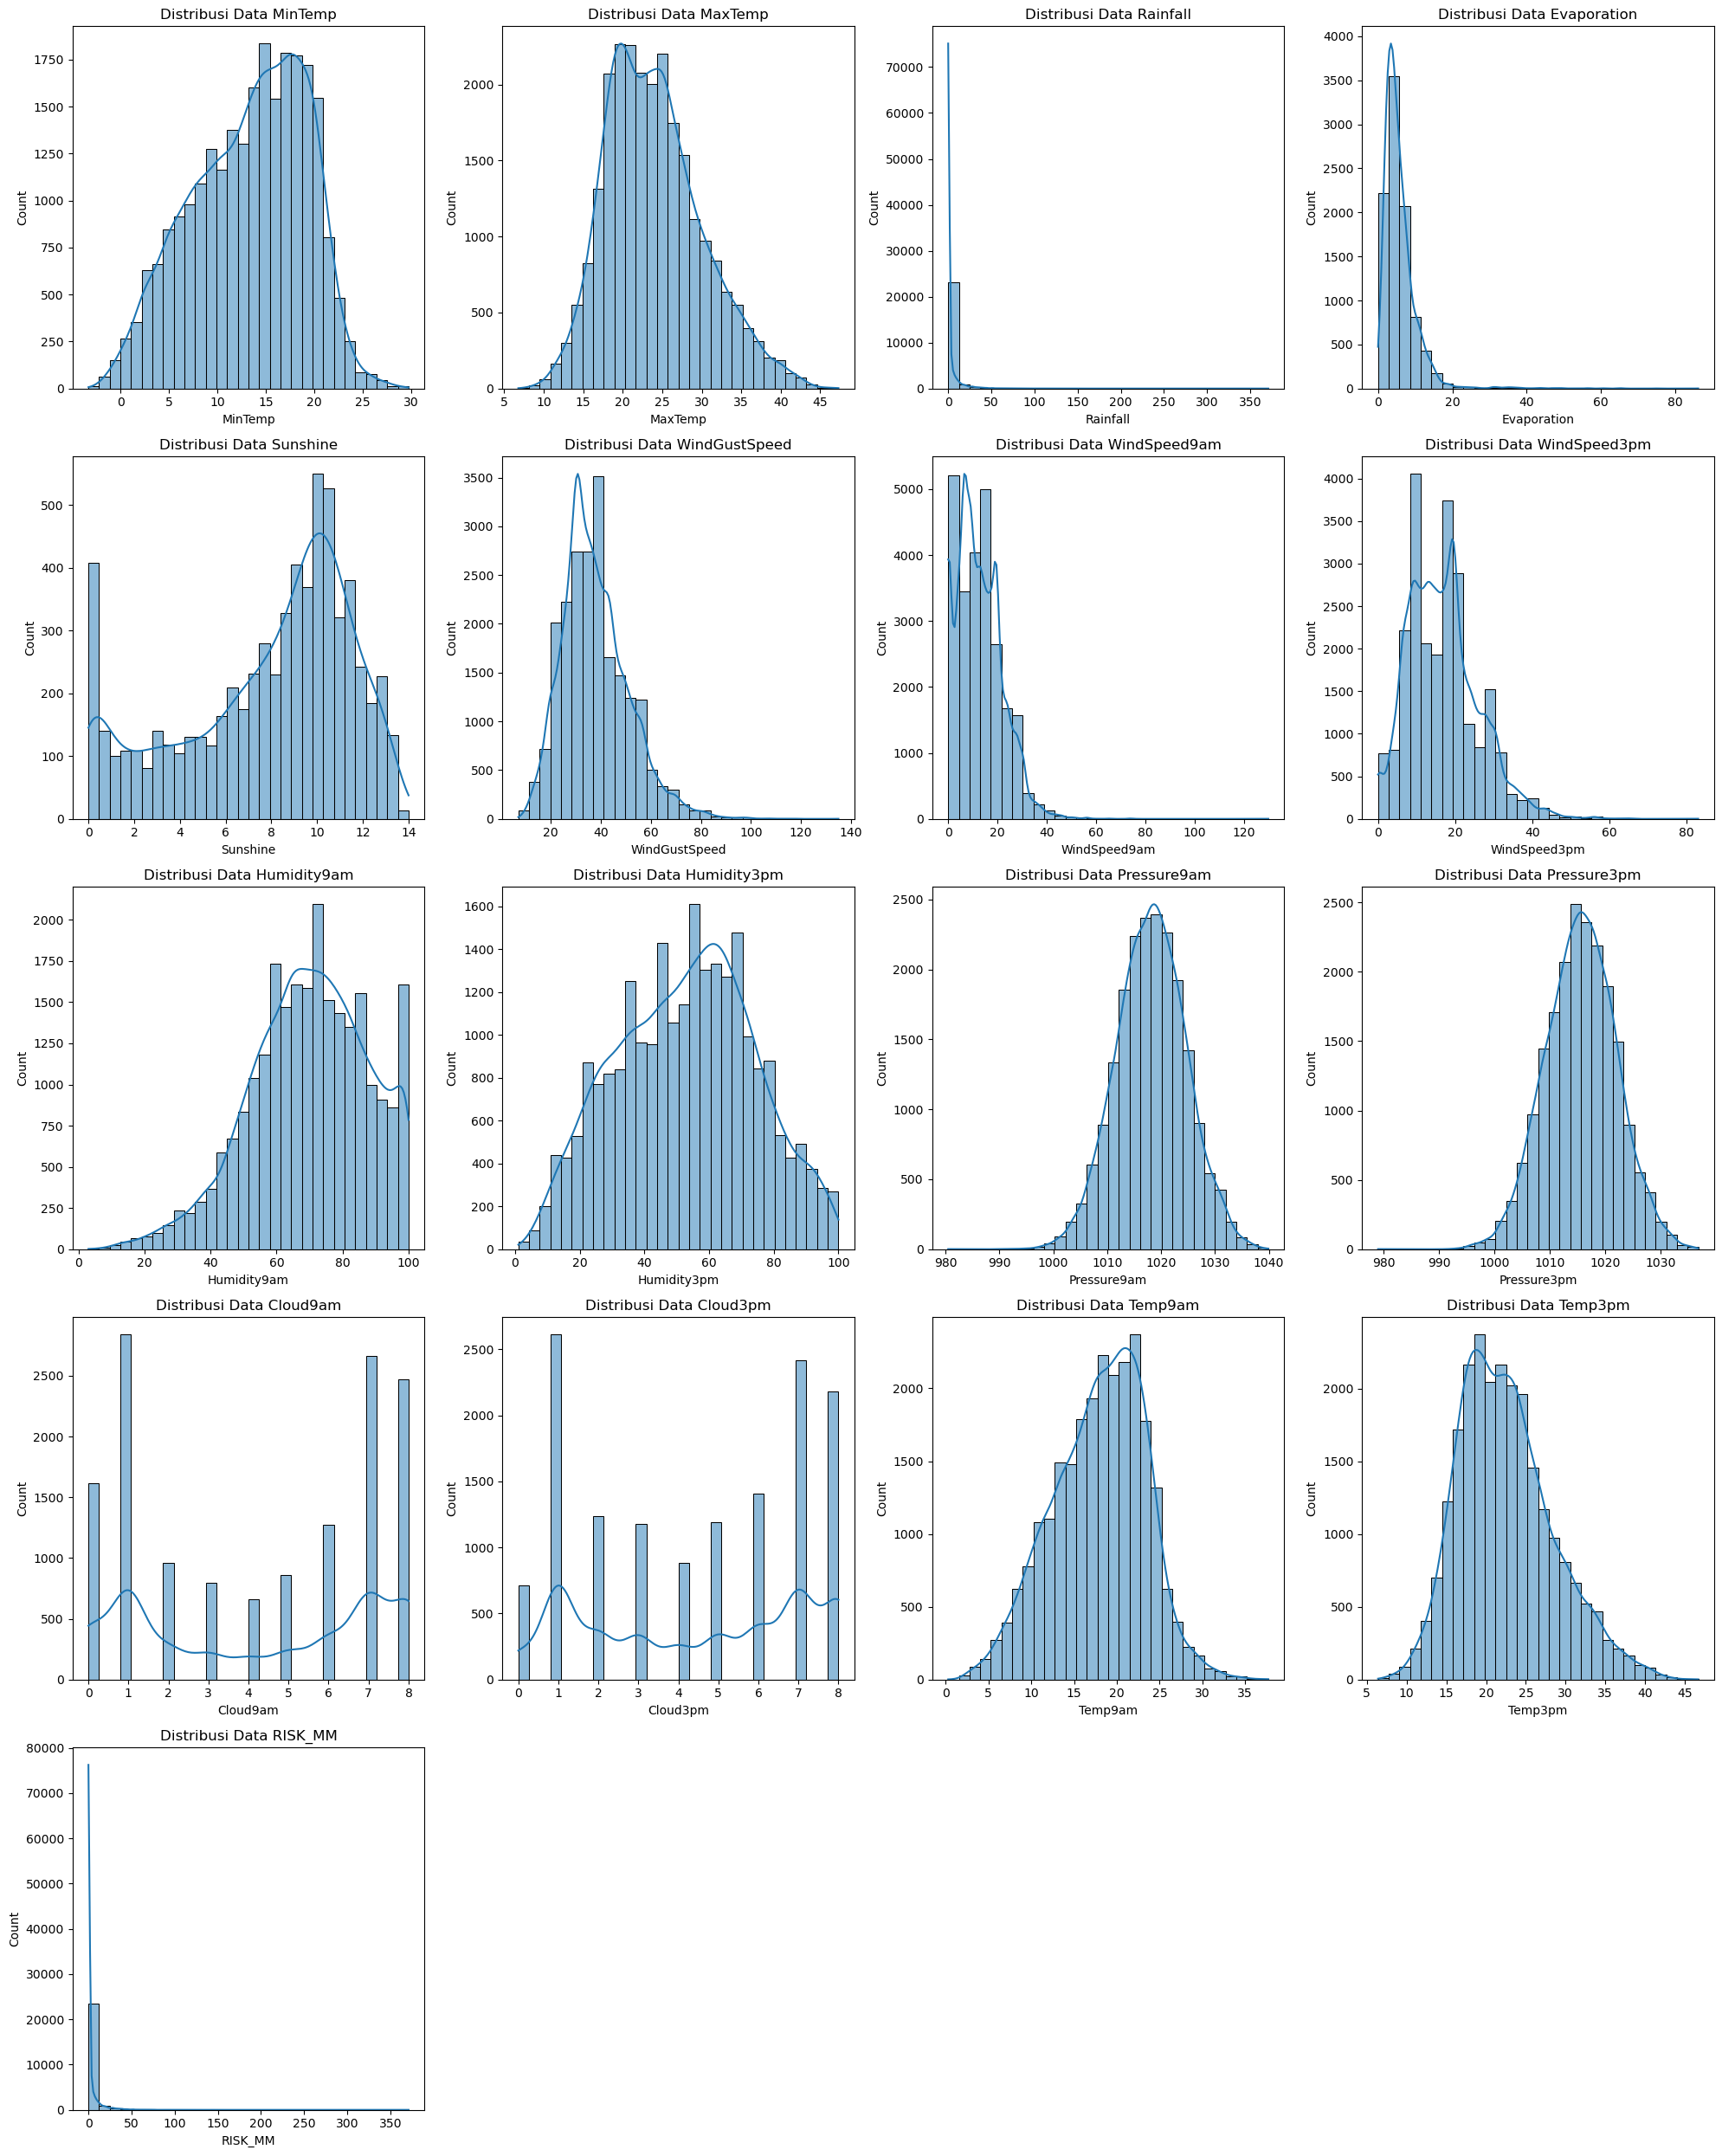

In [5]:
numerical_columns = df.select_dtypes(include="number").columns

plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(5, 4, i)
    sns.histplot(data=df[col], bins=30, kde=True)
    plt.title(f"Distribusi Data {col}")
plt.tight_layout()
plt.show()

Insight:
- Beberapa kolom tidak terdistribusi normal, seperti kolom RISK_MM dan kolom RainFall. Oleh karena itu, kolom tersebut memiliki data yang bias ke nilai tertentu. Namun, beberapa kolom lainnya terdistribusi normal.
---

C:\Users\Mahen\AppData\Local\Temp\ipykernel_6004\234622384.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  corr_df["RainTomorrow"] = corr_df["RainTomorrow"].replace({"Yes": 1, "No": 0})


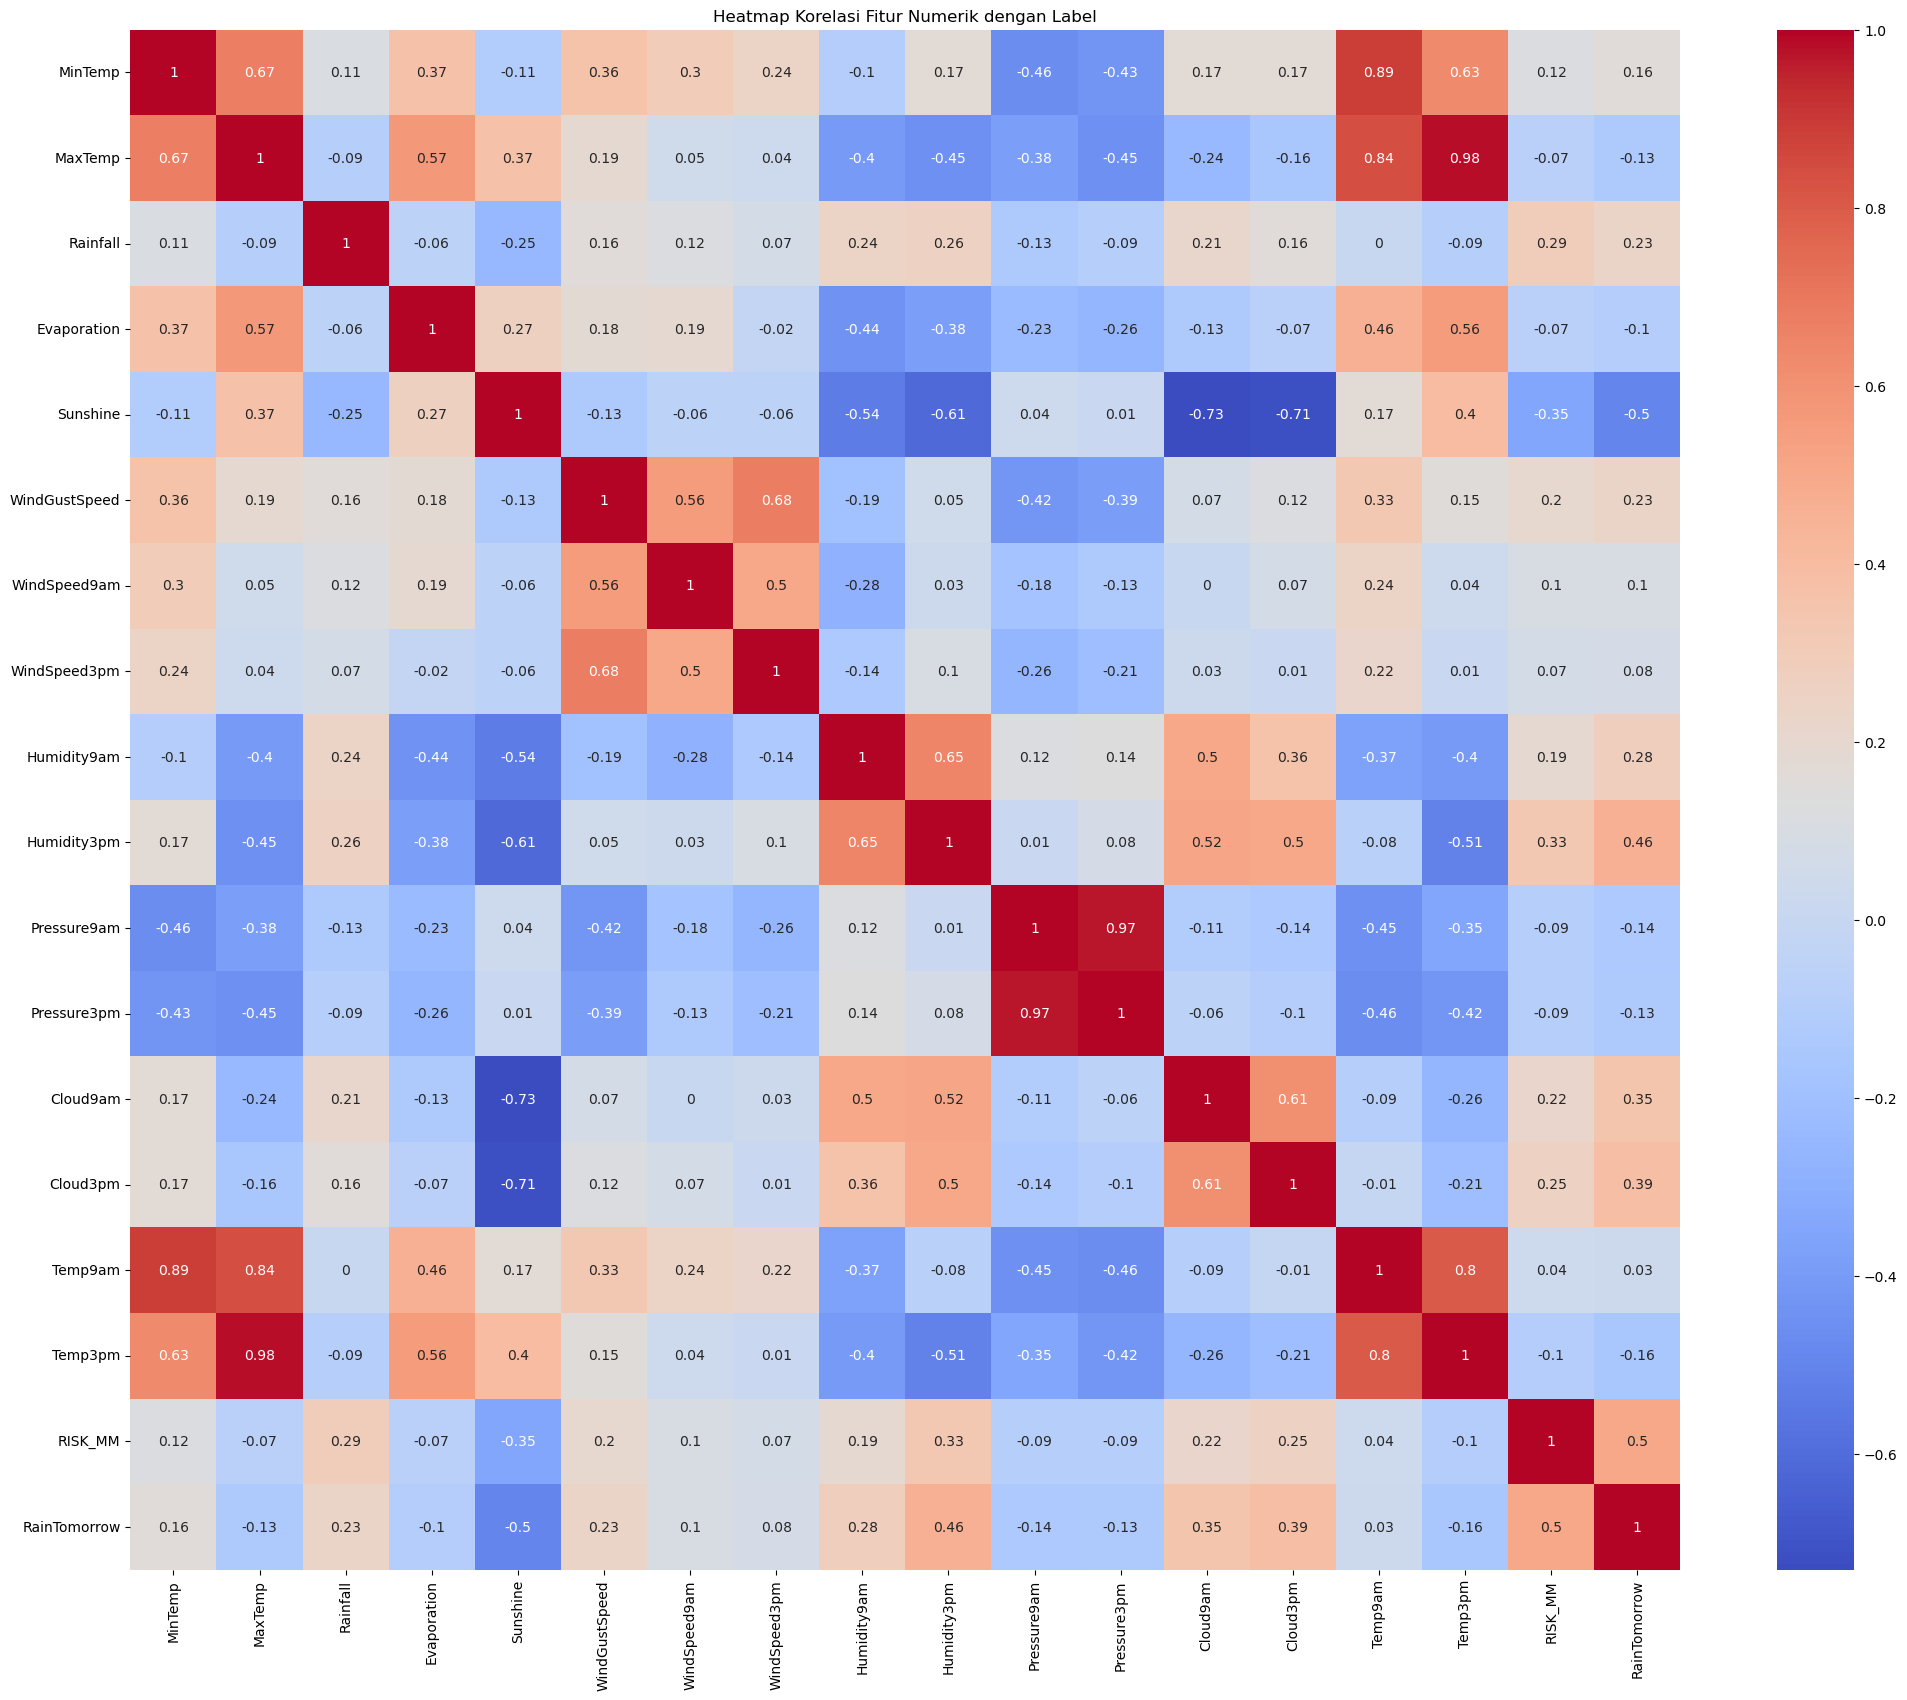

In [6]:
corr_df = df.copy()
corr_df["RainTomorrow"] = corr_df["RainTomorrow"].replace({"Yes": 1, "No": 0})

corr_numerical_columns = corr_df.select_dtypes(include="number").columns
corr_matrix = corr_df[corr_numerical_columns].corr().round(2)

# Menampilkan heatmap korelasi kolom numerik
plt.figure(figsize=(25, 20))
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik dengan Label")
plt.show()

Insight:
- Tidak ada kolom-kolom yang menjadi fitur bertentangan atatu tidak berkorelasi dengan kolom yang menjadi label, yaitu kolom RainTomorrow secara signifikan.
--- 

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
transform_df = df.copy()

transform_df.drop(columns="Date", inplace=True)

label_column = "RainTomorrow"
transform_df[label_column] = transform_df[label_column].map({"Yes": 1, "No": 0})

transform_df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,0


Insight:
- Menghapus kolom Date karena tidak digunakan sebagai fitur.

- Mengubah tipe data kategorik dari kolom RainTomorrow menjadi tipe data numerik.
---

## 5.1 Encoding Data Kategorik Berdasarkan Kolom Label

In [8]:
transform_categorical_columns = transform_df.select_dtypes(include="object").columns

for col in transform_categorical_columns:
    encoding_map = transform_df.groupby(col)[label_column].mean().to_dict()
    transform_df[col] = transform_df[col].map(encoding_map)

transform_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0.205247,13.4,22.9,0.6,NaN,NaN,0.186916,44.0,0.192623,0.192541,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.156066,0.0,0
1,0.205247,7.4,25.1,0.0,NaN,NaN,0.184441,44.0,0.251708,0.147860,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.156066,0.0,0
2,0.205247,12.9,25.7,0.0,NaN,NaN,0.169666,46.0,0.192623,0.147860,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.156066,0.0,0
3,0.205247,9.2,28.0,0.0,NaN,NaN,0.198408,24.0,0.223155,0.231229,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.156066,1.0,0
4,0.205247,17.5,32.3,1.0,NaN,NaN,0.186916,41.0,0.230298,0.207297,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.156066,0.2,0


Insight:
- Encoding data pada kolom kategorik berdasarkan nilai rata-rata label dari masing-masing nilai kolom kategorik.
---

## 5.2 Menangani Missing Values dan Standarisasi Fitur 

In [9]:
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       25000 non-null  float64
 1   MinTemp        24669 non-null  float64
 2   MaxTemp        24824 non-null  float64
 3   Rainfall       24721 non-null  float64
 4   Evaporation    9432 non-null   float64
 5   Sunshine       6664 non-null   float64
 6   WindGustDir    21543 non-null  float64
 7   WindGustSpeed  21545 non-null  float64
 8   WindDir9am     21928 non-null  float64
 9   WindDir3pm     23267 non-null  float64
 10  WindSpeed9am   24428 non-null  float64
 11  WindSpeed3pm   23770 non-null  float64
 12  Humidity9am    24609 non-null  float64
 13  Humidity3pm    23936 non-null  float64
 14  Pressure9am    20172 non-null  float64
 15  Pressure3pm    20173 non-null  float64
 16  Cloud9am       14136 non-null  float64
 17  Cloud3pm       13815 non-null  float64
 18  Temp9am    

In [10]:
features = transform_df.drop(columns=label_column, axis=1)

features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,0.205247,13.4,22.9,0.6,NaN,NaN,0.186916,44.0,0.192623,0.192541,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.156066,0.0
1,0.205247,7.4,25.1,0.0,NaN,NaN,0.184441,44.0,0.251708,0.147860,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.156066,0.0
2,0.205247,12.9,25.7,0.0,NaN,NaN,0.169666,46.0,0.192623,0.147860,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.156066,0.0
3,0.205247,9.2,28.0,0.0,NaN,NaN,0.198408,24.0,0.223155,0.231229,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.156066,1.0
4,0.205247,17.5,32.3,1.0,NaN,NaN,0.186916,41.0,0.230298,0.207297,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.156066,0.2


In [11]:
missing_feature_values = features.isnull().sum()

print("Jumlah Missing Values pada Fitur:")
print(missing_feature_values[missing_feature_values > 0])

Jumlah Missing Values pada Fitur:
MinTemp            331
MaxTemp            176
Rainfall           279
Evaporation      15568
Sunshine         18336
WindGustDir       3457
WindGustSpeed     3455
WindDir9am        3072
WindDir3pm        1733
WindSpeed9am       572
WindSpeed3pm      1230
Humidity9am        391
Humidity3pm       1064
Pressure9am       4828
Pressure3pm       4827
Cloud9am         10864
Cloud3pm         11185
Temp9am            245
Temp3pm            918
RainToday          279
dtype: int64


In [12]:
imputer = SimpleImputer(strategy="mean")
impute_missing_values = imputer.fit_transform(features.values)
imputed_features = pd.DataFrame(impute_missing_values, columns=features.columns)

imputed_features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,0.205247,13.4,22.9,0.6,5.825138,7.811945,0.186916,44.0,0.192623,0.192541,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.409265,16.9,21.8,0.156066,0.0
1,0.205247,7.4,25.1,0.0,5.825138,7.811945,0.184441,44.0,0.251708,0.147860,4.0,22.0,44.0,25.0,1010.6,1007.8,4.251556,4.409265,17.2,24.3,0.156066,0.0
2,0.205247,12.9,25.7,0.0,5.825138,7.811945,0.169666,46.0,0.192623,0.147860,19.0,26.0,38.0,30.0,1007.6,1008.7,4.251556,2.000000,21.0,23.2,0.156066,0.0
3,0.205247,9.2,28.0,0.0,5.825138,7.811945,0.198408,24.0,0.223155,0.231229,11.0,9.0,45.0,16.0,1017.6,1012.8,4.251556,4.409265,18.1,26.5,0.156066,1.0
4,0.205247,17.5,32.3,1.0,5.825138,7.811945,0.186916,41.0,0.230298,0.207297,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.156066,0.2


In [13]:
scaler = StandardScaler()
standardize_features = scaler.fit_transform(imputed_features.values)
standardized_features = pd.DataFrame(standardize_features, columns=features.columns)
standardized_features.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,-0.297071,0.018149,-0.178995,-0.214621,0.0,-4.626412e-16,-0.852031,0.507719,-1.159268,-0.792993,0.809793,0.807637,0.066816,-1.482301,-1.799036,-1.484517,1.679168e+00,0.000000,-0.196175,-0.121007,-0.539445,-0.275864
1,-0.297071,-1.014671,0.182095,-0.276696,0.0,-4.626412e-16,-0.916000,0.507719,0.952732,-2.053259,-0.961920,0.582131,-1.465868,-1.337746,-1.300892,-1.362656,3.978721e-16,0.000000,-0.140289,0.306777,-0.539445,-0.275864
2,-0.297071,-0.067920,0.280574,-0.276696,0.0,-4.626412e-16,-1.297819,0.670783,-1.159268,-2.053259,0.699061,1.033142,-1.806464,-1.096822,-1.816214,-1.205978,3.978721e-16,-1.191923,0.567599,0.118552,-0.539445,-0.275864
3,-0.297071,-0.704825,0.658077,-0.276696,0.0,-4.626412e-16,-0.555039,-1.122918,-0.067892,0.298229,-0.186796,-0.883656,-1.409102,-1.771410,-0.098476,-0.492220,3.978721e-16,0.000000,0.027368,0.683227,-0.539445,-0.172829
4,-0.297071,0.723909,1.363844,-0.173238,0.0,-4.626412e-16,-0.852031,0.263123,0.187410,-0.376800,-0.629724,0.356625,0.691243,-0.952268,-1.266538,-1.676013,1.231204e+00,1.776425,-0.028518,1.230791,-0.539445,-0.255257


In [14]:
transform_df = pd.concat([standardized_features, transform_df[label_column]], axis=1)

missing_values = transform_df.isnull().sum()

print("Jumlah Missing Values pada Fitur:")
print(missing_values[missing_values > 0])

Jumlah Missing Values pada Fitur:
Series([], dtype: int64)


In [15]:
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       25000 non-null  float64
 1   MinTemp        25000 non-null  float64
 2   MaxTemp        25000 non-null  float64
 3   Rainfall       25000 non-null  float64
 4   Evaporation    25000 non-null  float64
 5   Sunshine       25000 non-null  float64
 6   WindGustDir    25000 non-null  float64
 7   WindGustSpeed  25000 non-null  float64
 8   WindDir9am     25000 non-null  float64
 9   WindDir3pm     25000 non-null  float64
 10  WindSpeed9am   25000 non-null  float64
 11  WindSpeed3pm   25000 non-null  float64
 12  Humidity9am    25000 non-null  float64
 13  Humidity3pm    25000 non-null  float64
 14  Pressure9am    25000 non-null  float64
 15  Pressure3pm    25000 non-null  float64
 16  Cloud9am       25000 non-null  float64
 17  Cloud3pm       25000 non-null  float64
 18  Temp9a

In [16]:
transform_df.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,2.500000e+04,25000.000000
mean,4.934009e-16,1.807621e-16,4.385470e-16,-6.025402e-17,4.547474e-18,-5.808281e-16,6.480150e-16,-5.820766e-16,-6.366463e-16,9.856649e-16,1.591616e-16,3.296918e-16,-1.364242e-16,5.508127e-16,-1.182039e-14,-2.653451e-15,3.978306e-16,-4.547474e-18,1.421085e-16,5.826450e-16,2.245315e-17,8.100187e-18,0.223800
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,0.416798
min,-1.515037e+00,-2.856532e+00,-2.821517e+00,-2.766961e-01,-1.946833e+00,-4.069146e+00,-1.297819e+00,-2.508960e+00,-2.071353e+00,-2.053259e+00,-1.404848e+00,-1.898432e+00,-3.793278e+00,-2.494182e+00,-6.471282e+00,-6.376364e+00,-1.904545e+00,-2.181372e+00,-3.288530e+00,-2.756156e+00,-5.394450e-01,-2.758643e-01,0.000000
25%,-3.953133e-01,-7.392521e-01,-7.370433e-01,-2.766961e-01,0.000000e+00,-4.626412e-16,-8.520307e-01,-6.337272e-01,-9.197289e-01,-3.768001e-01,-7.404560e-01,-6.581503e-01,-6.711427e-01,-7.595287e-01,-5.450879e-01,-5.444465e-01,-1.126882e-01,-2.024736e-01,-6.805200e-01,-7.199043e-01,-5.394450e-01,-2.758643e-01,0.000000
50%,-2.970709e-01,1.042170e-01,-9.692927e-02,-2.766961e-01,0.000000e+00,-4.626412e-16,7.172780e-16,-5.793187e-16,9.921185e-16,2.779179e-02,-1.867958e-01,4.005786e-16,1.005038e-02,6.847473e-16,-1.952841e-14,0.000000e+00,3.978721e-16,0.000000e+00,8.325434e-02,-6.967256e-02,-5.394450e-01,-2.758643e-01,0.000000
75%,8.336376e-01,7.927632e-01,6.088375e-01,-1.939294e-01,0.000000e+00,-4.626412e-16,3.019247e-01,4.261871e-01,6.853002e-01,7.569212e-01,6.990607e-01,5.821311e-01,7.480095e-01,6.860155e-01,5.542641e-01,5.523022e-01,7.832401e-01,2.922510e-01,7.352568e-01,5.805592e-01,-5.394450e-01,-1.934360e-01,0.000000
max,1.381132e+00,2.823974e+00,3.825821e+00,3.810638e+01,2.686227e+01,3.223282e+00,2.721007e+00,7.927119e+00,1.583852e+00,1.722413e+00,1.299032e+01,7.460055e+00,1.713033e+00,2.276114e+00,3.732078e+00,3.685870e+00,1.679168e+00,1.776425e+00,3.678582e+00,4.139722e+00,1.874679e+00,3.795024e+01,1.000000


Insight:
- Penanganan missing values dilakukan pada kolom-kolom sebagai fitur dengan melakukan imputasi nilai rata-rata pada masing-masing fitur.

- Standarisasi juga dilakukan pada kolom-kolom sebagai fitur untuk memastikan bahwa setiap fitur berkontribusi secara proposional.
---

## 5.3 Splitting Data

In [ ]:
X = transform_df.drop(columns="RainTomorrow", axis=1)
y = transform_df["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1993
)

print("Train Set Shape:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTest Set Shape:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Train Set Shape:
X_train: (20000, 22)
y_train: (20000,)

Test Set Shape:
X_test: (5000, 22)
y_test: (5000,)


Insight:
- Membagi dataset setelah melalui data preprocessing menjadi train set dan test set. Komposisi pembagian dataset adalah train set sebesar 80% atau sebanyak 20000 baris data dan test set sebesar 20% atau sebanyak 5000 baris data.
---

## 5.4 Menyimpan Hasil Data Preprocessing

In [18]:
X_train.to_csv("notebook_weather_preprocessing/X_train.csv", index=False)
X_test.to_csv("notebook_weather_preprocessing/X_test.csv", index=False)

In [19]:
pd.DataFrame(y_train, columns=["RainTomorrow"]).to_csv(
    "notebook_weather_preprocessing/y_train.csv", index=False
)
pd.DataFrame(y_test, columns=["RainTomorrow"]).to_csv(
    "notebook_weather_preprocessing/y_test.csv", index=False
)

Insight:
- Menyimpan hasil dari data preprocessing ke dalam bentuk file csv dan disimpan di folder notebook_weather_preprocessing.
---